# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import requests
from io import BytesIO
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import re
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
wrd_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
wrd_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
image_predictions_df = pd.read_csv(BytesIO(requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content), sep='\t')
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
image_predictions_df.duplicated().sum()

0

In [5]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
def download_tweet_data():
    """
    Download tweet data from Twitter's servers and save it to a file.
    """
    # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
    # These are hidden to comply with Twitter's API terms and conditions
    consumer_key = 'HIDDEN'
    consumer_secret = 'HIDDEN'
    access_token = 'HIDDEN'
    access_secret = 'HIDDEN'

    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)

    # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
    # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
    # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
    # NOTE TO REVIEWER: this student had mobile verification issues so the following
    # Twitter API code was sent to this student from a Udacity instructor
    # Tweet IDs for which to gather additional data via Twitter's API
    tweet_ids = wrd_archive_df.tweet_id.values
    len(tweet_ids)

    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
    # Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except Exception as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [7]:
tweet_data = []
with open('tweet-json.txt', mode='rb') as file:
    for line in file.readlines():
        try:
            line_json = json.loads(line.strip())
            tweet_data.append(line_json)
        except Exception as e:
            print(f'Error parsing line data to json', e)
            break

tweet_data_df = pd.DataFrame(tweet_data)
tweet_data_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [8]:
tweet_data_df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



##### `source` column should be categorical

In [9]:
wrd_archive_df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [10]:
wrd_archive_df.source.dtypes

dtype('O')

##### `timestamp` and `retweeted_status_timestamp` columns should be datetime

In [11]:
wrd_archive_df.timestamp.dtypes

dtype('O')

In [12]:
wrd_archive_df.retweeted_status_timestamp.dtypes

dtype('O')

##### multiple and sometimes duplicate values in the `expanded_urls` column

In [13]:
wrd_archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [14]:
wrd_archive_df.at[4, 'expanded_urls'].split(',')[0] == wrd_archive_df.at[4, 'expanded_urls'].split(',')[1]

True

In [15]:
wrd_archive_df.expanded_urls.str.split(',').str.len().value_counts()

1.0    1658
2.0     365
4.0     134
3.0     120
5.0      10
6.0       6
8.0       4
Name: expanded_urls, dtype: int64

In [16]:
wrd_archive_df.expanded_urls[wrd_archive_df.expanded_urls.str.split(',').str.len() > 4].at[114].split(',')

['https://www.gofundme.com/help-fix-codys-torn-acl',
 'https://twitter.com/dog_rates/status/870656317836468226/photo/1',
 'https://twitter.com/dog_rates/status/870656317836468226/photo/1',
 'https://twitter.com/dog_rates/status/870656317836468226/photo/1',
 'https://twitter.com/dog_rates/status/870656317836468226/photo/1']

In [17]:
set(wrd_archive_df.expanded_urls[wrd_archive_df.expanded_urls.str.split(',').str.len() > 4].at[114].split(','))

{'https://twitter.com/dog_rates/status/870656317836468226/photo/1',
 'https://www.gofundme.com/help-fix-codys-torn-acl'}

In [18]:
wrd_archive_df.expanded_urls[wrd_archive_df.expanded_urls.str.split(',').str.len() > 6].at[446].split(',')

['https://twitter.com/dog_rates/status/819004803107983360/photo/1',
 'https://twitter.com/dog_rates/status/819004803107983360/photo/1',
 'https://twitter.com/dog_rates/status/819004803107983360/photo/1',
 'https://twitter.com/dog_rates/status/819004803107983360/photo/1',
 'https://twitter.com/dog_rates/status/819004803107983360/photo/1',
 'https://twitter.com/dog_rates/status/819004803107983360/photo/1',
 'https://twitter.com/dog_rates/status/819004803107983360/photo/1',
 'https://twitter.com/dog_rates/status/819004803107983360/photo/1']

In [19]:
set(wrd_archive_df.expanded_urls[wrd_archive_df.expanded_urls.str.split(',').str.len() > 6].at[446].split(','))

{'https://twitter.com/dog_rates/status/819004803107983360/photo/1'}

So the problem is that the same tweet url gets duplicated, so we only need to find the unique values.

##### same dog has values for multiple stages, and some dogs have no names

In [20]:
wrd_archive_df.loc[200:200, ['tweet_id','name','doggo','floofer']]

,tweet_id,name,doggo,floofer
200,854010172552949760,None,doggo,floofer


##### some dogs have no names

In [21]:
wrd_archive_df.name.replace('None', np.nan).isnull().sum()

745

In [22]:
wrd_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [23]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
image_predictions_df.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1680,813800681631023104,https://pbs.twimg.com/media/C0szZh_XUAAm9je.jpg,1,malamute,0.501159,True,Siberian_husky,0.228792,True,Eskimo_dog,0.200388,True
1778,828408677031882754,https://pbs.twimg.com/media/C38ZSzlWIAEpQzs.jpg,1,Weimaraner,0.133033,True,Chesapeake_Bay_retriever,0.092227,True,American_Staffordshire_terrier,0.065094,True
270,670822709593571328,https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg,1,web_site,0.993887,False,Chihuahua,0.001252,True,menu,0.000599,False
264,670797304698376195,https://pbs.twimg.com/media/CU8mlhoVAAAteS5.jpg,1,Pembroke,0.472197,True,beagle,0.090938,True,German_shepherd,0.064366,True
858,696886256886657024,https://pbs.twimg.com/media/CavWWdFWAAArflW.jpg,1,kuvasz,0.383941,True,golden_retriever,0.289085,True,dingo,0.056548,False
815,692752401762250755,https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...,1,Samoyed,0.471276,True,Siberian_husky,0.158850,True,Eskimo_dog,0.138672,True
158,668872652652679168,https://pbs.twimg.com/media/CUhQIAhXAAA2j7u.jpg,1,teddy,0.413379,False,pillow,0.325623,False,miniature_schnauzer,0.035537,True
583,678800283649069056,https://pbs.twimg.com/media/CWuVQSLW4AAI3w9.jpg,1,Labrador_retriever,0.213673,True,beagle,0.146235,True,Airedale,0.122701,True
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
653,682047327939461121,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,1,teddy,0.364095,False,doormat,0.119243,False,toyshop,0.035127,False


##### mix of hyphens and underscores in predicted dog names, and some other chars like quotes

In [25]:
image_predictions_df.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [26]:
pd.Series(image_predictions_df.p1.str.lower().str.replace(r'[^\w]', '_').str.replace(r'_{2,}', '_').unique()).duplicated().sum()

/var/folders/n6/1rqbgtyn1mx4km2y_v9vchlm0000gn/T/ipykernel_4455/4109190390.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  pd.Series(image_predictions_df.p1.str.lower().str.replace(r'[^\w]', '_').str.replace(r'_{2,}', '_').unique()).duplicated().sum()


0

In [27]:
pd.Series(image_predictions_df.p2.str.lower().str.replace(r'[^\w]', '_').str.replace(r'_{2,}', '_').unique()).duplicated().sum()

/var/folders/n6/1rqbgtyn1mx4km2y_v9vchlm0000gn/T/ipykernel_4455/3189986371.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  pd.Series(image_predictions_df.p2.str.lower().str.replace(r'[^\w]', '_').str.replace(r'_{2,}', '_').unique()).duplicated().sum()


0

In [28]:
pd.Series(image_predictions_df.p3.str.lower().str.replace(r'[^\w]', '_').str.replace(r'_{2,}', '_').unique()).duplicated().sum()

/var/folders/n6/1rqbgtyn1mx4km2y_v9vchlm0000gn/T/ipykernel_4455/1191303577.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  pd.Series(image_predictions_df.p3.str.lower().str.replace(r'[^\w]', '_').str.replace(r'_{2,}', '_').unique()).duplicated().sum()


0

##### some rows in the predictions are dogs even though they're predicted to not be

In [29]:
def render_images(df: pd.DataFrame, plot_title: str = 'Showing images of rows predicted to not be dogs'):
    fig = plt.figure(figsize=(10,10))
    rows = 2
    columns = 2
    plt.title(plot_title)
    plt.axis('off')
    for ind, url in enumerate(df.jpg_url):
        if ind > 3:
            break
        img_resp = requests.get(url)
        img = Image.open(BytesIO(img_resp.content))
        fig.add_subplot(rows, columns, ind + 1)
        plt.imshow(img)
        plt.axis('off')

In [30]:
# only the first prediction is not a dog
image_predictions_df[~(image_predictions_df.p1_dog)].head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False


In [31]:
# at least one prediction is a dog
image_predictions_df[(image_predictions_df.p1_dog) | (image_predictions_df.p2_dog) | (image_predictions_df.p3_dog)].head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [32]:
# all predictions are not a dog
image_predictions_df[~(image_predictions_df.p1_dog) & ~(image_predictions_df.p2_dog) & ~(image_predictions_df.p3_dog)].head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False


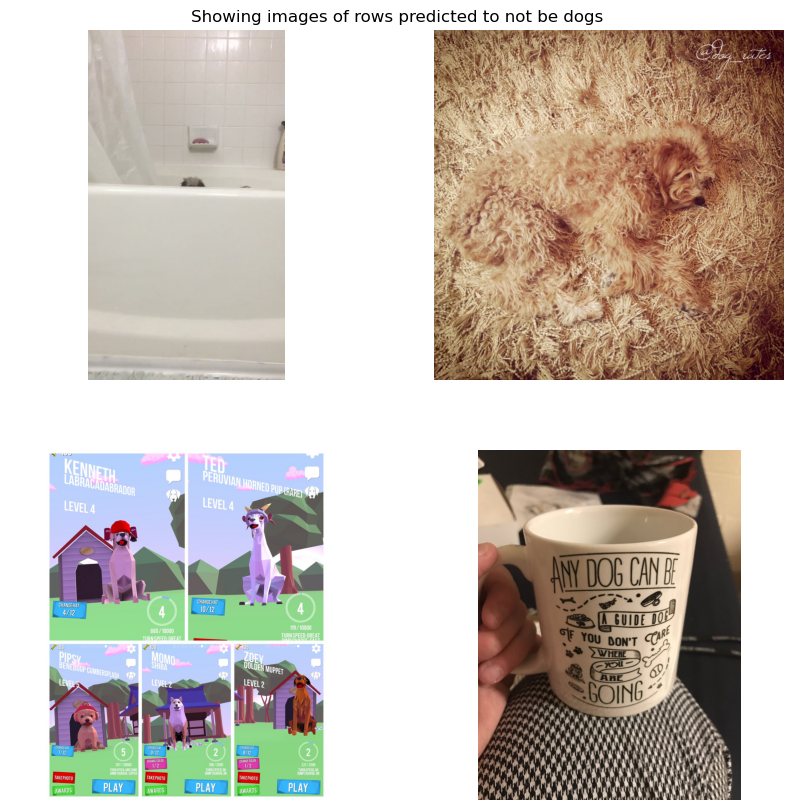

In [33]:
# re-run this cell multiple times for different random samples
try:
    render_images(image_predictions_df[~(image_predictions_df.p1_dog) & ~(image_predictions_df.p2_dog) & ~(image_predictions_df.p3_dog)].sample(4))
except Exception as e:
    # some images may fail, just try one more time for another random batch
    render_images(image_predictions_df[~(image_predictions_df.p1_dog) & ~(image_predictions_df.p2_dog) & ~(image_predictions_df.p3_dog)].sample(4))

In [34]:
image_predictions_df.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [35]:
tweet_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [36]:
tweet_data_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


##### erroneous data types for some columns in tweet data

In [37]:
tweet_data_df.created_at.unique()

array(['Tue Aug 01 16:23:56 +0000 2017', 'Tue Aug 01 00:17:27 +0000 2017',
       'Mon Jul 31 00:18:03 +0000 2017', ...,
       'Sun Nov 15 23:21:54 +0000 2015', 'Sun Nov 15 23:05:30 +0000 2015',
       'Sun Nov 15 22:32:08 +0000 2015'], dtype=object)

In [38]:
tweet_data_df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [39]:
tweet_data_df.possibly_sensitive.unique()

array([False, nan], dtype=object)

In [40]:
tweet_data_df.possibly_sensitive_appealable.unique()

array([False, nan], dtype=object)

In [41]:
tweet_data_df.lang.unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

In [42]:
tweet_data_df[~(tweet_data_df.retweeted_status.isnull())].loc[:, 'retweeted_status'].head()

31    {'created_at': 'Sat Jul 15 02:44:07 +0000 2017...
35    {'created_at': 'Sun Feb 12 01:04:29 +0000 2017...
67    {'created_at': 'Fri Jun 23 01:10:23 +0000 2017...
72    {'created_at': 'Fri Jun 23 16:00:04 +0000 2017...
73    {'created_at': 'Tue Nov 24 03:51:38 +0000 2015...
Name: retweeted_status, dtype: object

##### some fields in tweet data are completely empty (`geo`, `coordinates`, `contributors`)

In [43]:
tweet_data_df.loc[:, ['geo', 'coordinates', 'user', 'place', 'contributors']][tweet_data_df.geo.isnull()].shape[0] == tweet_data_df.shape[0]

True

In [44]:
tweet_data_df.loc[:, ['geo', 'coordinates', 'user', 'place', 'contributors']]

,geo,coordinates,user,place,contributors
0,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None
1,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None
2,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None
3,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None
4,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None
...,...,...,...,...,...
2349,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None
2350,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None
2351,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None
2352,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None


In [45]:
tweet_data_df.contributors.isnull().sum()

2354

In [46]:
tweet_data_df[~(tweet_data_df.place.isnull())].at[857, 'place']

{'id': '7356b662670b2c31',
 'url': 'https://api.twitter.com/1.1/geo/id/7356b662670b2c31.json',
 'place_type': 'city',
 'name': 'Clifton',
 'full_name': 'Clifton, NJ',
 'country_code': 'US',
 'country': 'United States',
 'contained_within': [],
 'bounding_box': {'type': 'Polygon',
  'coordinates': [[[-74.1977277, 40.82028],
    [-74.118533, 40.82028],
    [-74.118533, 40.899384],
    [-74.1977277, 40.899384]]]},
 'attributes': {}}

##### `display_text_range` in tweet data contains 2 sets of info

In [47]:
tweet_data_df.display_text_range.head()

0     [0, 85]
1    [0, 138]
2    [0, 121]
3     [0, 79]
4    [0, 138]
Name: display_text_range, dtype: object

##### some tweets are retweets

In [48]:
wrd_archive_df.retweeted_status_id.notnull().sum()

181

In [49]:
wrd_archive_df[wrd_archive_df.retweeted_status_id.notnull()].loc[:, ['tweet_id', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].head()

,tweet_id,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
19,888202515573088257,RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000
32,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000
36,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000
68,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000
73,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000


In [50]:
wrd_archive_df.in_reply_to_status_id.notnull().sum()

78

In [51]:
wrd_archive_df[wrd_archive_df.in_reply_to_status_id.notnull()].loc[:, ['tweet_id', 'text', 'in_reply_to_status_id', 'in_reply_to_user_id']].head()

,tweet_id,text,in_reply_to_status_id,in_reply_to_user_id
30,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,8.862664e+17,2.281182e+09
55,881633300179243008,@roushfenway These are good dogs but 17/10 is ...,8.816070e+17,4.738443e+07
64,879674319642796034,@RealKentMurphy 14/10 confirmed,8.795538e+17,3.105441e+09
113,870726314365509632,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,8.707262e+17,1.648776e+07
148,863427515083354112,@Jack_Septic_Eye I'd need a few more pics to p...,8.634256e+17,7.759620e+07


### Quality issues
1. erroneous data types (for `timestamp`, `source`, `retweeted_status_timestamp` columns) in wrd archive

2. erroneous data types (for `created_at`, `source`, `lang` columns) in tweet data

3. some dogs have values for multiple stages

4. some dogs have no names or wrong names

5. `p1`, `p2`, and `p3` contain names with inconsistent casing and separators (mixes uppercase and lowercase, mixes hyphens and underscores, and has some other non-letter chars like quotes)

6. some rows are predicted to not be dogs at all even though they do contain dogs (saw "banana", and "china_cabinet", to name a few)

7. some fields in tweet data are completely empty (`geo`, `coordinates`, `contributors`)

8. sometimes duplicated urls in `expanded_urls` column

9. some tweets are retweets

10. inconsistent denominators for ratings

### Tidiness issues
1. merge the 3 dataframes into one because they're all part of the same observational unit

2. wrd archive has 4 columns for the same "dog stage" observation (doggo, floofer, pupper, puppo)

3. tweet data has columns that contain duplicated info (all column names that end with `_str` are just string versions of the same info in the column lacking the suffix)

4. `display_text_range` in tweet data contains 2 sets of info

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [52]:
# Make copies of original pieces of data
wrd_archive_clean_df = wrd_archive_df.copy()
image_predictions_clean_df = image_predictions_df.copy()
tweet_data_clean_df = tweet_data_df.copy()

### **Quality issues**

### Issue #1: erroneous data types (for `timestamp`, `source`, `retweeted_status_timestamp` columns) in wrd archive

#### Define
- `timestamp`: change directly using `to_datetime`
- `source`: replace the html with the interior text and convert them to categories
- `retweeted_status_timestamp`: change directly using `to_datetime`

#### Code

In [53]:
# timestamp
wrd_archive_clean_df.timestamp = pd.to_datetime(wrd_archive_clean_df.timestamp)
wrd_archive_clean_df.timestamp.dtypes

datetime64[ns, UTC]

In [54]:
# retweeted_status_timestamp
wrd_archive_clean_df.retweeted_status_timestamp = pd.to_datetime(wrd_archive_clean_df.retweeted_status_timestamp)
wrd_archive_clean_df.retweeted_status_timestamp.dtypes

datetime64[ns, UTC]

In [55]:
# source
wrd_archive_clean_df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [56]:
# source
wrd_archive_clean_df.source = wrd_archive_clean_df.source.str.extract(r'>(?P<source>[^<]+)<').source.str.replace(' - Make a Scene', '').astype('category')
wrd_archive_clean_df.source.dtypes

CategoricalDtype(categories=['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone',
                  'Vine'],
, ordered=False)

#### Test

In [57]:
for col in ['timestamp', 'source', 'retweeted_status_timestamp']:
    print(f'column "{col}" dtype: {wrd_archive_clean_df[col].dtypes}')

column "timestamp" dtype: datetime64[ns, UTC]
column "source" dtype: category
column "retweeted_status_timestamp" dtype: datetime64[ns, UTC]


### Issue #2: erroneous data types (for created_at, source, lang columns) in tweet data

#### Define
- `created_at`: change directly using `to_datetime`
- `source`: replace the html with the interior text and convert them to categories
- `lang`: convert to category

#### Code

In [58]:
# created_at
tweet_data_clean_df.created_at = pd.to_datetime(tweet_data_clean_df.created_at)
tweet_data_clean_df.created_at.dtypes

datetime64[ns, UTC]

In [59]:
# source
tweet_data_clean_df.source = tweet_data_clean_df.source.str.extract(r'>(?P<source>[^<]+)<').source.str.replace(' - Make a Scene', '').astype('category')
tweet_data_clean_df.source.dtypes

CategoricalDtype(categories=['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone',
                  'Vine'],
, ordered=False)

In [60]:
# lang
tweet_data_clean_df.lang = tweet_data_clean_df.lang.astype('category')
tweet_data_clean_df.lang.dtypes

CategoricalDtype(categories=['en', 'es', 'et', 'eu', 'in', 'nl', 'ro', 'tl', 'und'], ordered=False)

#### Test

In [61]:
for col in ['created_at', 'source', 'lang']:
    print(f'column "{col}" dtype: {tweet_data_clean_df[col].dtypes}')

column "created_at" dtype: datetime64[ns, UTC]
column "source" dtype: category
column "lang" dtype: category


### Issue #3: some dogs have values for multiple dog stages

#### Define
- replace the `"None"` values with `None`
- use `apply` to set a single value based on the oldest stage the dog is in

In [62]:
wrd_archive_clean_df.loc[:, 'doggo':'puppo'][~(wrd_archive_clean_df.loc[:, 'doggo':'puppo'].replace('None', None).doggo.isnull())]

,doggo,floofer,pupper,puppo
9,doggo,None,None,None
43,doggo,None,None,None
99,doggo,None,None,None
108,doggo,None,None,None
110,doggo,None,None,None
...,...,...,...,...
1117,doggo,None,None,None
1141,doggo,None,None,None
1156,doggo,None,None,None
1176,doggo,None,None,None


#### Code

In [63]:
wrd_archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [64]:
def set_oldest_dog_stage(row: pd.Series):
    # check if the series has multiple dog stage values, select the oldest one
    num_empty_cols = row.loc['doggo':'puppo'].replace('None', None).isnull().sum()
    if num_empty_cols <= 2:
        # this means there are duplicate stage values, keep only the highest stage
        if row.at["doggo"]:
            row.at["floofer"] = None
            row.at["pupper"] = None
            row.at["puppo"] = None
        elif row.at['floofer']:
            row.at["pupper"] = None
            row.at["puppo"] = None
        elif row.at['pupper']:
            row.at["puppo"] = None
        return row
    else:
        # there are no duplicate stage values
        return row

In [65]:
wrd_archive_clean_df = wrd_archive_clean_df.apply(set_oldest_dog_stage, axis='columns')

#### Test

In [66]:
# before cleaning, these are the rows with duplicate dog stages
wrd_archive_df.loc[:, 'doggo':'puppo'][wrd_archive_df.loc[:, 'doggo':'puppo'].replace('None', np.nan).isnull().sum(axis=1) <= 2]

,doggo,floofer,pupper,puppo
191,doggo,None,None,puppo
200,doggo,floofer,None,None
460,doggo,None,pupper,None
531,doggo,None,pupper,None
565,doggo,None,pupper,None
575,doggo,None,pupper,None
705,doggo,None,pupper,None
733,doggo,None,pupper,None
778,doggo,None,pupper,None
822,doggo,None,pupper,None


In [67]:
# after cleaning, there are no rows with duplicate dog stages
wrd_archive_clean_df.loc[:, 'doggo':'puppo'][wrd_archive_clean_df.loc[:, 'doggo':'puppo'].replace('None', np.nan).isnull().sum(axis=1) <= 2]

,doggo,floofer,pupper,puppo


### Issue #4: some dogs have no names or wrong names

#### Define
- replace the string `"None"` values with the `None` value throughout the dataframe to properly represent null fields
- replace all names that start with a lowercase letter with `None`

#### Code

In [68]:
wrd_archive_clean_df.replace('None', None, inplace=True)

In [69]:
wrd_archive_clean_df.name = wrd_archive_clean_df.name.apply(lambda x: x if x and x[0:1].isupper() else None)

#### Test

In [70]:
assert wrd_archive_df.name.isnull().sum() == 0
assert wrd_archive_clean_df.name.isnull().sum() > 0
assert wrd_archive_clean_df.name.str.slice(0,1).str.islower().sum() == 0

### Issue #5: `p1`, `p2`, and `p3` contain names with inconsistent casing and separators (mixes uppercase and lowercase, and mixes hyphens and underscores, and has some other non-letter chars like quotes)

#### Define
- replace all non-letter chars with underscores
- replace all duplicated underscores with a single underscore
- convert all names to lowercase

#### Code

In [71]:
for col in ['p1', 'p2', 'p3']:
    image_predictions_clean_df[col] = image_predictions_clean_df[col].str.replace(r'[^\w]', '_').str.replace(r'_{2,}', '_').str.lower()

/var/folders/n6/1rqbgtyn1mx4km2y_v9vchlm0000gn/T/ipykernel_4455/672761648.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  image_predictions_clean_df[col] = image_predictions_clean_df[col].str.replace(r'[^\w]', '_').str.replace(r'_{2,}', '_').str.lower()


#### Test

In [72]:
for col in ['p1', 'p2', 'p3']:
    # find the list of values that contain either dashes or quotes in the original df
    assert len(list(filter(lambda x: re.search('[^\w]', x), image_predictions_df[col].unique()))) > 0
    # check that there are no such values in the cleaned df
    assert len(list(filter(lambda x: re.search('[^\w]', x), image_predictions_clean_df[col].unique()))) == 0

### Issue #6: some rows are predicted to not be dogs at all even though they do contain dogs (saw "banana", and "china_cabinet", to name a few)

#### Define
- remove the rows for which all 3 predictions are not dog
    - not precise because some of those pics do contain dogs, but better to be sure that we're removing most if not all of the non-dogs
- remove the rows in all 3 dataframes for consistency

#### Code

In [73]:
non_dog_tweets = image_predictions_clean_df[~(image_predictions_clean_df.p1_dog) & ~(image_predictions_clean_df.p2_dog) & ~(image_predictions_clean_df.p3_dog)].tweet_id
non_dog_tweets

6       666051853826850816
17      666104133288665088
18      666268910803644416
21      666293911632134144
25      666362758909284353
               ...        
2021    880935762899988482
2022    881268444196462592
2046    886680336477933568
2052    887517139158093824
2074    892420643555336193
Name: tweet_id, Length: 324, dtype: int64

In [74]:
# removing from wrd archive df
wrd_archive_clean_df.drop(index=wrd_archive_clean_df[wrd_archive_clean_df.tweet_id.isin(non_dog_tweets)].index, inplace=True)

In [75]:
# removing from image predictions df
image_predictions_clean_df.drop(index=image_predictions_clean_df[image_predictions_clean_df.tweet_id.isin(non_dog_tweets)].index, inplace=True)

In [76]:
# removing from tweet data df
tweet_data_clean_df.drop(index=tweet_data_clean_df[tweet_data_clean_df.id.isin(non_dog_tweets)].index, inplace=True)

#### Test

In [77]:
assert image_predictions_clean_df[~(image_predictions_clean_df.p1_dog) & ~(image_predictions_clean_df.p2_dog) & ~(image_predictions_clean_df.p3_dog)].size == 0

### Issue #7: some fields in tweet data are completely empty (geo, coordinates, contributors)

#### Define

- find all the columns in the tweet data dataset that are completely empty
- remove those columns from the dataframe

#### Code

In [78]:
tweet_data_empty_cols = ['geo', 'coordinates', 'contributors']

In [79]:
tweet_data_clean_df.drop(columns=tweet_data_empty_cols, inplace=True)

#### Test

In [80]:
for col in tweet_data_empty_cols:
    assert col not in tweet_data_clean_df.columns

### Issue #8: multiple and sometimes duplicated urls in expanded_urls column

#### Define
- use `apply` to find the unique values in the `expanded_urls` column and then replace the column with only the unique values

In [81]:
def get_unique_urls(row: pd.Series) -> str:
    urls = row.expanded_urls
    if urls:
        return ','.join(pd.Series(str(urls).split(',')).unique().tolist())
    else:
        return None

In [82]:
wrd_archive_clean_df.expanded_urls = wrd_archive_clean_df.apply(get_unique_urls, axis='columns')

#### Test

In [83]:
# before cleaning
wrd_archive_df.expanded_urls.str.split(',').str.len().value_counts()

1.0    1658
2.0     365
4.0     134
3.0     120
5.0      10
6.0       6
8.0       4
Name: expanded_urls, dtype: int64

In [84]:
# after cleaning
wrd_archive_clean_df.expanded_urls.str.split(',').str.len().value_counts()

1    1993
2      39
Name: expanded_urls, dtype: int64

### Issue 9: some tweets are retweets

#### Define
- remove the rows that are retweets
- remove the rows that are replies to other tweets
- remove the columns associated with both of those

#### Code

In [85]:
wrd_archive_clean_df = wrd_archive_clean_df[(wrd_archive_clean_df.retweeted_status_id.isnull()) & (wrd_archive_clean_df.in_reply_to_status_id.isnull())]

In [86]:
wrd_archive_clean_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [87]:
wrd_archive_clean_df = wrd_archive_clean_df.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'])

#### Test

In [88]:
wrd_archive_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [89]:
retweet_and_replies_idx = pd.concat([wrd_archive_df.retweeted_status_id.dropna().astype(int).astype(str), wrd_archive_df.in_reply_to_status_id.dropna().astype(int).astype(str)]).index
retweet_and_replies_tweet_ids = wrd_archive_df[wrd_archive_df.index.isin(retweet_and_replies_idx)].tweet_id
assert wrd_archive_clean_df.tweet_id.isin(retweet_and_replies_tweet_ids).sum() == 0

### Issue 10: inconsistent denominators for ratings

#### Define
- create a new `rating_normalized` column that's the decimal version of the numerator divided by denominator then multiplied by 10 (to get a 10 point scale)

#### Code

In [90]:
wrd_archive_clean_df['rating_normalized'] = wrd_archive_clean_df.rating_numerator / wrd_archive_clean_df.rating_denominator * 10

#### Test

In [91]:
wrd_archive_clean_df.rating_normalized.head()

1    13.0
2    12.0
3    13.0
4    12.0
5    13.0
Name: rating_normalized, dtype: float64

### **Tidiness issues**

### Issue #1: all 3 dataframes are part of the same observational unit

#### Define
- merge the archive and the predictions dataframes, then merge the result with the tweet data dataframe
- use inner joins to only preserve tweets that are present across all 3 dataframes
- delete columns that are no longer needed

#### Code

In [92]:
all_3_df = pd.merge(wrd_archive_clean_df, image_predictions_clean_df, left_on='tweet_id', right_on='tweet_id', how='inner').merge(tweet_data_clean_df, left_on='tweet_id', right_on='id', how='inner')

In [93]:
all_3_df.columns

Index(['tweet_id', 'timestamp', 'source_x', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'rating_normalized', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source_y',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'place', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')

In [94]:
empty_cols = all_3_df.columns[all_3_df.isnull().all()]
all_3_df.drop(columns=empty_cols, inplace=True)
all_3_df.columns

Index(['tweet_id', 'timestamp', 'source_x', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'rating_normalized', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source_y',
       'user', 'place', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

In [95]:
# check for columns with different names but the same values
for first, second in [('id', 'tweet_id'), ('text', 'full_text'), ('timestamp', 'created_at'), ('source_x', 'source_y')]:
    print(f'number of rows where "{first}" is not equal to "{second}": {all_3_df.query(f"{first} != {second}").shape[0]}')

number of rows where "id" is not equal to "tweet_id": 0
number of rows where "text" is not equal to "full_text": 0
number of rows where "timestamp" is not equal to "created_at": 0
number of rows where "source_x" is not equal to "source_y": 0


The above rows are all duplicate rows that can be dropped.


In [96]:
wrd_archive_clean_df = all_3_df.drop(columns=['id', 'full_text', 'created_at', 'source_y']).rename(columns={'source_x': 'source'})

#### Test

In [97]:
wrd_archive_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'rating_normalized', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'id_str', 'truncated', 'display_text_range', 'entities',
       'extended_entities', 'user', 'place', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'],
      dtype='object')

### Issue #2: the archive csv has 4 columns for the same observation (doggo, floofer, pupper, puppo)

#### Define
- use `melt` to combine the 4 columns into a single column called `stage`
- there are 2 types of rows to be handled: those that have no dog stage (all 4 columns are `"None"`), and those that have a dog stage (at least one of the 4 columns is not `"None"`)
- for the ones that have no stage, we only want to keep one of the duplicate rows
    - can only be sure of this by getting the tweet ID from the unmelted df
    - after getting the tweet ID, we'd then drop all rows that are duplicates of that tweet ID
        - tweet ID is in the collection that lack a stage and is duplicated in the series for duplicates of the tweet ID column
            - so we need to get the collection of tweet IDs that lack a stage
        - save the index entries for these rows and drop them
- for the ones that have a stage, we want to keep the row with the stage
    - can only be sure of this by getting the tweet ID from the unmelted df
    - after getting the tweet ID, we'd then drop all rows with that tweet ID and no stage
        - tweet ID is in the collection that have a stage and has no value in the new dog stage column
            - so we need to get the collection of tweet IDs that have a stage
    - then we'd drop all rows that have no stage
- merge the new dog stage column into the archive df and drop the previous columns

#### Code

In [98]:
stages_to_melt = ['doggo', 'floofer', 'pupper', 'puppo']

In [99]:
melted_dog_stages = pd.melt(wrd_archive_clean_df, id_vars=['tweet_id'], value_vars=stages_to_melt, var_name='dog_stage_name', value_name='dog_stage')
melted_dog_stages.head()

,tweet_id,dog_stage_name,dog_stage
0,892177421306343426,doggo,None
1,891815181378084864,doggo,None
2,891689557279858688,doggo,None
3,891327558926688256,doggo,None
4,891087950875897856,doggo,None


In [100]:
no_stage_tweet_ids = wrd_archive_clean_df[wrd_archive_clean_df.loc[:, 'doggo':'puppo'].isnull().all(axis=1)].tweet_id
no_stage_duplicated_index = melted_dog_stages[(melted_dog_stages.tweet_id.isin(no_stage_tweet_ids)) & (melted_dog_stages.tweet_id.duplicated())].index
melted_dog_stages.drop(index=no_stage_duplicated_index, inplace=True)
melted_dog_stages.head()

,tweet_id,dog_stage_name,dog_stage
0,892177421306343426,doggo,None
1,891815181378084864,doggo,None
2,891689557279858688,doggo,None
3,891327558926688256,doggo,None
4,891087950875897856,doggo,None


In [101]:
has_stage_tweet_ids = wrd_archive_clean_df[wrd_archive_clean_df.loc[:, 'doggo':'puppo'].notnull().any(axis=1)].tweet_id
has_stage_duplicated_index = melted_dog_stages[(melted_dog_stages.tweet_id.isin(has_stage_tweet_ids)) & (melted_dog_stages.dog_stage.isnull())].index
melted_dog_stages.drop(index=has_stage_duplicated_index, inplace=True)
melted_dog_stages.head()

,tweet_id,dog_stage_name,dog_stage
0,892177421306343426,doggo,None
1,891815181378084864,doggo,None
2,891689557279858688,doggo,None
3,891327558926688256,doggo,None
4,891087950875897856,doggo,None


In [102]:
melted_dog_stages.drop(columns='dog_stage_name', inplace=True)
melted_dog_stages.head()

,tweet_id,dog_stage
0,892177421306343426,None
1,891815181378084864,None
2,891689557279858688,None
3,891327558926688256,None
4,891087950875897856,None


In [103]:
wrd_archive_clean_df = wrd_archive_clean_df.merge(melted_dog_stages, on='tweet_id', how='outer')
wrd_archive_clean_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,place,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,dog_stage
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,None,False,6514,33819,False,False,False,False,en,None
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,None,False,4328,25461,False,False,False,False,en,None
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,None,False,8964,42908,False,False,False,False,en,None
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,None,False,9774,41048,False,False,False,False,en,None
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,...,None,False,3261,20562,False,False,False,False,en,None


In [104]:
wrd_archive_clean_df.drop(columns=stages_to_melt, inplace=True)
wrd_archive_clean_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_normalized,jpg_url,...,place,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,dog_stage
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,None,False,6514,33819,False,False,False,False,en,None
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,None,False,4328,25461,False,False,False,False,en,None
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,None,False,8964,42908,False,False,False,False,en,None
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,None,False,9774,41048,False,False,False,False,en,None
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,13.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,None,False,3261,20562,False,False,False,False,en,None


#### Test

In [105]:
for stage in stages_to_melt:
    assert stage not in wrd_archive_clean_df.columns

### Issue #3: tweet data has columns that contain duplicated info (all column names that end with `_str`, they are just number and string versions of the same info in the column lacking the suffix)

#### Define
- delete all columns that end with the `_str` suffix

#### Code

In [106]:
wrd_archive_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'rating_normalized',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'id_str', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'user', 'place',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'lang', 'dog_stage'],
      dtype='object')

In [107]:
duplicated_str_cols = list(filter(lambda x: x.endswith('_str'), wrd_archive_clean_df.columns.tolist()))
duplicated_str_cols

['id_str']

In [108]:
wrd_archive_clean_df.drop(columns=duplicated_str_cols, inplace=True)
wrd_archive_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'rating_normalized',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'truncated', 'display_text_range',
       'entities', 'extended_entities', 'user', 'place', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'dog_stage'],
      dtype='object')

#### Test

In [109]:
for col in duplicated_str_cols:
    assert col in tweet_data_df.columns
    assert col not in wrd_archive_clean_df.columns

### Issue 4: `display_text_range` in tweet data contains 2 sets of info

#### Define
- the values are arrays, so create 2 new columns: one for the start of display text, and the other for the end of display text
- drop the original `display_text_range` column

In [110]:
wrd_archive_clean_df.display_text_range.head()

0    [0, 138]
1    [0, 121]
2     [0, 79]
3    [0, 138]
4    [0, 138]
Name: display_text_range, dtype: object

In [111]:
wrd_archive_clean_df['display_text_start'] = wrd_archive_clean_df.display_text_range.str.get(0)
wrd_archive_clean_df['display_text_end'] = wrd_archive_clean_df.display_text_range.str.get(1)
wrd_archive_clean_df.drop(columns='display_text_range', inplace=True)
wrd_archive_clean_df.loc[:, 'display_text_start':'display_text_end'].head()

,display_text_start,display_text_end
0,0,138
1,0,121
2,0,79
3,0,138
4,0,138


In [112]:
wrd_archive_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'rating_normalized',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'truncated', 'entities',
       'extended_entities', 'user', 'place', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'dog_stage', 'display_text_start', 'display_text_end'],
      dtype='object')

#### Test

In [113]:
assert 'display_text_range' not in wrd_archive_clean_df.columns
assert 'display_text_start' in wrd_archive_clean_df.columns
assert 'display_text_end' in wrd_archive_clean_df.columns

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [114]:
wrd_archive_clean_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### Metrics of interest
- average rating (deduced from `rating_numerator`)
- average confidence that the item is a dog
- most retweeted and favorited tweets
- average number of retweets and favorites
- highest rated dog stages
- highest rated dog names
- most popular dog names (i.e. the ones that appeared the most)

In [115]:
wrd_archive_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'rating_normalized',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'truncated', 'entities',
       'extended_entities', 'user', 'place', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'dog_stage', 'display_text_start', 'display_text_end'],
      dtype='object')

In [116]:
wrd_archive_clean_df.describe()

,tweet_id,rating_numerator,rating_denominator,rating_normalized,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,display_text_start,display_text_end
count,1.666000e+03,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1.666000e+03,1666.000000,1666.000000,1666.0,1666.000000
mean,7.395044e+17,11.388355,10.468788,10.878650,1.214286,0.605894,0.137377,6.126978e-02,2834.429772,9288.184274,0.0,110.696879
std,6.801710e+16,7.489081,6.343940,2.515433,0.573959,0.266392,0.101624,5.192826e-02,4831.960790,12641.538890,0.0,26.308266
min,6.660209e+17,0.000000,2.000000,0.000000,1.000000,0.044333,0.000010,2.160900e-07,16.000000,81.000000,0.0,32.000000
25%,6.775503e+17,10.000000,10.000000,10.000000,1.000000,0.379132,0.054788,1.593940e-02,650.500000,2176.000000,0.0,93.000000
50%,7.141778e+17,11.000000,10.000000,11.000000,1.000000,0.607074,0.121376,4.985555e-02,1440.500000,4464.000000,0.0,115.000000
75%,7.931921e+17,12.000000,10.000000,12.000000,1.000000,0.853256,0.199369,9.465742e-02,3261.000000,11734.750000,0.0,136.000000
max,8.921774e+17,165.000000,150.000000,75.000000,4.000000,0.999984,0.467678,2.734190e-01,79515.000000,132810.000000,0.0,148.000000


# average rating (deduced from `rating_normalized` column)

In [117]:
# multiply by 
wrd_archive_clean_df.rating_normalized.mean()

10.878650161363245

# average confidence that the item is a dog

In [118]:
wrd_archive_clean_df.p1_conf.mean()

0.6058936594237696

In [119]:
wrd_archive_clean_df.p2_conf.mean()

0.13737725997490996

In [120]:
wrd_archive_clean_df.p3_conf.mean()

0.06126978307059422

# most retweeted and favorited tweets

In [121]:
def render_tweet_image(url: str, plot_title: str):
    plt.title(plot_title)
    plt.axis('off')
    img_resp = requests.get(url)
    img = Image.open(BytesIO(img_resp.content))
    plt.imshow(img)
    plt.show()

In [122]:
wrd_archive_clean_df.sort_values('retweet_count', ascending=False).head().loc[:,['retweet_count', 'tweet_id']]

,retweet_count,tweet_id
686,79515,744234799360020481
360,56625,807106840509214720
714,52360,739238157791694849
275,48265,822872901745569793
53,45849,879415818425184262


In [123]:
wrd_archive_clean_df[wrd_archive_clean_df.tweet_id == wrd_archive_clean_df.sort_values('retweet_count', ascending=False).head().loc[:,['retweet_count', 'tweet_id']].tweet_id.iloc[0]].reset_index().at[0, 'text']

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

In [124]:
wrd_archive_clean_df[wrd_archive_clean_df.tweet_id == wrd_archive_clean_df.sort_values('retweet_count', ascending=False).head().loc[:,['retweet_count', 'tweet_id']].tweet_id.iloc[0]].reset_index().at[0, 'jpg_url']

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

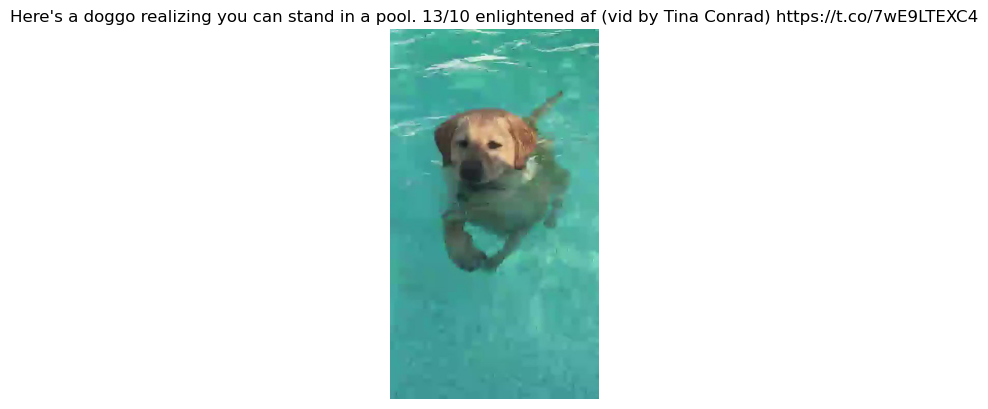

In [125]:
most_retweeted_tweet = wrd_archive_clean_df[wrd_archive_clean_df.tweet_id == wrd_archive_clean_df.sort_values('retweet_count', ascending=False).reset_index().tweet_id.at[0]].reset_index()
render_tweet_image(most_retweeted_tweet.jpg_url.at[0], most_retweeted_tweet.text.at[0])

In [126]:
wrd_archive_clean_df.sort_values('favorite_count', ascending=False).head().loc[:,['favorite_count', 'tweet_id']]

,favorite_count,tweet_id
275,132810,822872901745569793
686,131075,744234799360020481
53,107956,879415818425184262
360,107015,807106840509214720
100,106827,866450705531457537


In [127]:
wrd_archive_clean_df[wrd_archive_clean_df.tweet_id == wrd_archive_clean_df.sort_values('favorite_count', ascending=False).head().loc[:,['favorite_count', 'tweet_id']].tweet_id.iloc[0]].reset_index().at[0, 'text']

"Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc"

In [128]:
wrd_archive_clean_df[wrd_archive_clean_df.tweet_id == wrd_archive_clean_df.sort_values('favorite_count', ascending=False).head().loc[:,['favorite_count', 'tweet_id']].tweet_id.iloc[0]].reset_index().at[0, 'jpg_url']

'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg'

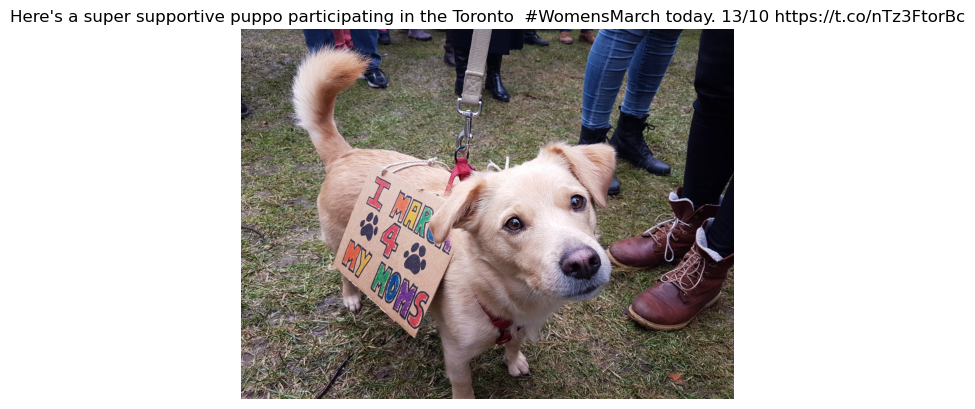

In [129]:
most_favorited_tweet = wrd_archive_clean_df[wrd_archive_clean_df.tweet_id == wrd_archive_clean_df.sort_values('favorite_count', ascending=False).reset_index().tweet_id.at[0]].reset_index()
render_tweet_image(most_favorited_tweet.jpg_url.at[0], most_favorited_tweet.text.at[0])

In [130]:
wrd_archive_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'rating_normalized',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'truncated', 'entities',
       'extended_entities', 'user', 'place', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'dog_stage', 'display_text_start', 'display_text_end'],
      dtype='object')

# average number of retweets and favorites

In [131]:
wrd_archive_clean_df.describe().loc['mean':'max', 'retweet_count':'favorite_count']

,retweet_count,favorite_count
mean,2834.429772,9288.184274
std,4831.960790,12641.538890
min,16.000000,81.000000
25%,650.500000,2176.000000
50%,1440.500000,4464.000000
75%,3261.000000,11734.750000
max,79515.000000,132810.000000


# highest rated dog stages

In [132]:
wrd_archive_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'rating_normalized',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'truncated', 'entities',
       'extended_entities', 'user', 'place', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'dog_stage', 'display_text_start', 'display_text_end'],
      dtype='object')

- dog stages are in the archive df
- ratings are in the archive df too, so this analysis is possible without merging dataframes
- need to groupby dog stage
- then get the average ratings for each stage
- can also add a visualization for this one

In [133]:
dog_stage_ratings = wrd_archive_clean_df.groupby('dog_stage')
dog_stage_ratings

In [134]:
dog_stage_ratings.mean().loc[:, 'rating_normalized':'rating_normalized'].sort_values('rating_normalized', ascending=False)

/var/folders/n6/1rqbgtyn1mx4km2y_v9vchlm0000gn/T/ipykernel_4455/1234918868.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dog_stage_ratings.mean().loc[:, 'rating_normalized':'rating_normalized'].sort_values('rating_normalized', ascending=False)


,rating_normalized
dog_stage,
floofer,12.000000
puppo,11.952381
doggo,11.841270
pupper,10.963855


/var/folders/n6/1rqbgtyn1mx4km2y_v9vchlm0000gn/T/ipykernel_4455/3532292231.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_dog_stage_ratings = dog_stage_ratings.mean().sort_values('rating_normalized', ascending=False)


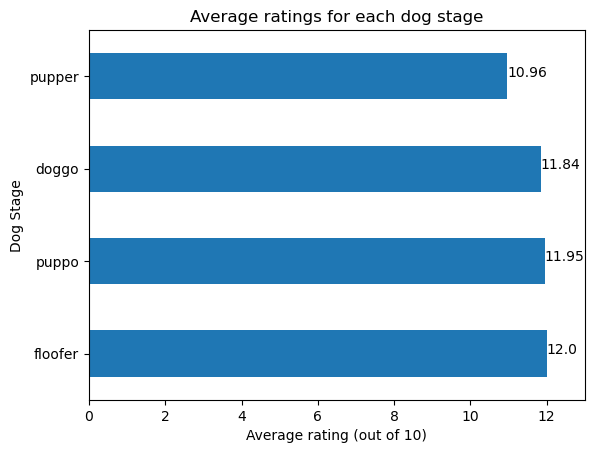

In [135]:
mean_dog_stage_ratings = dog_stage_ratings.mean().sort_values('rating_normalized', ascending=False)
mean_dog_stage_ratings.plot.barh(y='rating_normalized', legend=False, xlim=(0, mean_dog_stage_ratings.rating_normalized.max() + 1))
plt.title('Average ratings for each dog stage')
plt.ylabel('Dog Stage')
plt.xlabel('Average rating (out of 10)')

for ind, stage in enumerate(mean_dog_stage_ratings.index):
    mean_val = round(mean_dog_stage_ratings.at[stage,'rating_normalized'], 2)
    plt.annotate(mean_val, xy=(mean_val, ind))

plt.show()

**INSIGHT**: Looks like the furry dogs got the highest average ratings!

# highest rated dog names

- need to group by dog names and then plot bar charts showing the averages and their labels
- essentially this is almost the same as the dog stage equivalent
- however, we want only dog names that occur more than thrice

In [136]:
wrd_archive_clean_df.name.value_counts().head(25)

Lucy       10
Charlie    10
Cooper     10
Oliver      9
Tucker      9
Penny       8
Sadie       7
Daisy       7
Winston     7
Lola        6
Toby        6
Jax         6
Koda        6
Bo          5
Bella       5
Leo         5
Stanley     5
Rusty       5
Oscar       5
Bailey      4
Bear        4
Dexter      4
Alfie       4
Scooter     4
Milo        4
Name: name, dtype: int64

In [137]:
multi_dog_names = wrd_archive_clean_df.name.value_counts()[wrd_archive_clean_df.name.value_counts() > 3].index
multi_dog_names

Index(['Lucy', 'Charlie', 'Cooper', 'Oliver', 'Tucker', 'Penny', 'Sadie',
       'Daisy', 'Winston', 'Lola', 'Toby', 'Jax', 'Koda', 'Bo', 'Bella', 'Leo',
       'Stanley', 'Rusty', 'Oscar', 'Bailey', 'Bear', 'Dexter', 'Alfie',
       'Scooter', 'Milo', 'Jack', 'Sophie', 'Duke', 'Dave', 'Larry', 'Finn',
       'Louis', 'Reggie', 'Scout', 'Gus', 'Brody', 'Bentley', 'Chester',
       'Oakley', 'George', 'Winnie', 'Cassie', 'Maggie'],
      dtype='object')

In [138]:
wrd_archive_clean_df[wrd_archive_clean_df.name.isin(multi_dog_names)].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_normalized,jpg_url,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,dog_stage,display_text_start,display_text_end
5,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,13.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,2158,12041,False,False,False,False,en,None,0,140
8,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,14.0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,7711,32467,False,False,False,False,en,doggo,0,133
9,890006608113172480,2017-07-26 00:31:25+00:00,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,13.0,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,...,7624,31166,False,False,False,False,en,None,0,130
14,889278841981685760,2017-07-24 00:19:32+00:00,Twitter for iPhone,This is Oliver. You're witnessing one of his m...,https://twitter.com/dog_rates/status/889278841...,13,10,Oliver,13.0,https://pbs.twimg.com/ext_tw_video_thumb/88927...,...,5637,25652,False,False,False,False,en,None,0,138
31,884876753390489601,2017-07-11 20:47:12+00:00,Twitter for iPhone,This is Lola. It's her first time outside. Mus...,https://twitter.com/dog_rates/status/884876753...,13,10,Lola,13.0,https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg,...,6096,28514,False,False,False,False,en,None,0,118


In [139]:
dog_name_ratings = wrd_archive_clean_df[wrd_archive_clean_df.name.isin(multi_dog_names)].groupby('name')
dog_name_ratings

In [140]:
mean_dog_name_ratings = dog_name_ratings.mean(numeric_only=True)
mean_dog_name_ratings.sort_values(by='rating_normalized', ascending=False, inplace=True)
mean_dog_name_ratings.loc[:, ['rating_numerator', 'rating_denominator', 'rating_normalized']].head()

,rating_numerator,rating_denominator,rating_normalized
name,,,
Sophie,15.0,10.0,15.0
Stanley,12.0,10.0,12.0
Bear,12.0,10.0,12.0
Bo,12.0,10.0,12.0
Leo,12.0,10.0,12.0


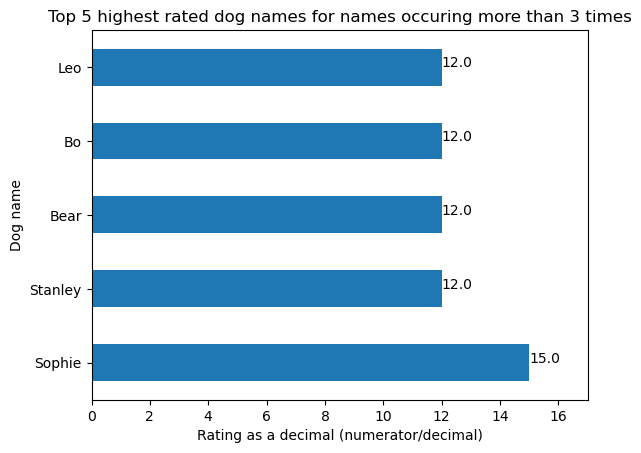

In [141]:
mean_dog_name_ratings.head().plot.barh(y='rating_normalized', legend=False, xlim=(0, mean_dog_name_ratings.rating_normalized.max() + 2))

plt.title('Top 5 highest rated dog names for names occuring more than 3 times')
plt.ylabel('Dog name')
plt.xlabel('Rating as a decimal (numerator/decimal)')

for ind, name in enumerate(mean_dog_name_ratings.head().index):
    name_avg = mean_dog_name_ratings.at[name,'rating_normalized']
    plt.annotate(name_avg, xy=(name_avg, ind))

plt.show();

**INSIGHT**: "Sophie" is not a bad name for a dog!

An example of a tweet featuring a dog named "Sophie".

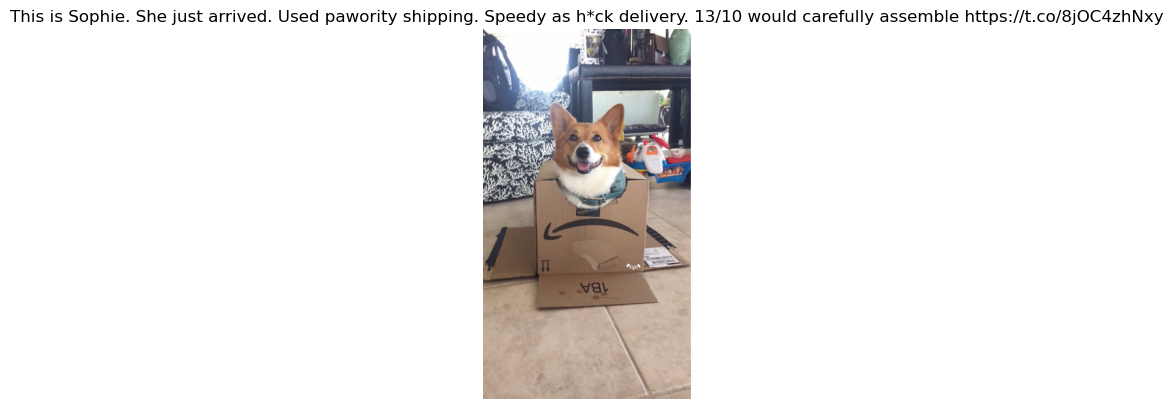

In [142]:
sophie_row = wrd_archive_clean_df.query(f'name == "Sophie"').reset_index()
render_tweet_image(sophie_row.jpg_url.at[0], sophie_row.text.at[0])

# most loved dog stages (i.e. the ones that had the most retweets and favorites)

- group by dog stage and get the average retweets and favorites
- can also add a visualization for this one

- step 1: isolate the tweets with dog stages
- step 3: group by dog stage
- step 4: get the mean retweet and favorite counts for each dog stage
- step 4: plot the retweet and favorite counts for each dog stage
- step 5: annotate the plot with the mean values

In [143]:
tweets_with_dog_stages = wrd_archive_clean_df[~(wrd_archive_clean_df.dog_stage.isnull())]
tweets_with_dog_stages.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_normalized,jpg_url,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,dog_stage,display_text_start,display_text_end
8,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,14.0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,7711,32467,False,False,False,False,en,doggo,0,133
11,889665388333682689,2017-07-25 01:55:32+00:00,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,13.0,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,...,8538,38818,False,False,False,False,en,puppo,0,106
13,889531135344209921,2017-07-24 17:02:04+00:00,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,13.0,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,...,2321,15359,False,False,False,False,en,puppo,0,118
25,886366144734445568,2017-07-15 23:25:31+00:00,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,12.0,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,...,3316,21524,False,False,False,False,en,pupper,0,131
34,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,12.0,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,...,3128,20771,False,False,False,False,en,doggo,0,140


In [144]:
tweets_with_dog_stages = tweets_with_dog_stages.loc[:,['tweet_id', 'dog_stage', 'retweet_count', 'favorite_count']]
tweets_with_dog_stages.head()

,tweet_id,dog_stage,retweet_count,favorite_count
8,890240255349198849,doggo,7711,32467
11,889665388333682689,puppo,8538,38818
13,889531135344209921,puppo,2321,15359
25,886366144734445568,pupper,3316,21524
34,884162670584377345,doggo,3128,20771


In [145]:
mean_popularity_by_dog_stages = tweets_with_dog_stages.groupby('dog_stage').mean().drop(columns='tweet_id')
mean_popularity_by_dog_stages

,retweet_count,favorite_count
dog_stage,,
doggo,6928.238095,19204.222222
floofer,4968.714286,13206.000000
pupper,2440.469880,7584.584337
puppo,6375.761905,21457.809524


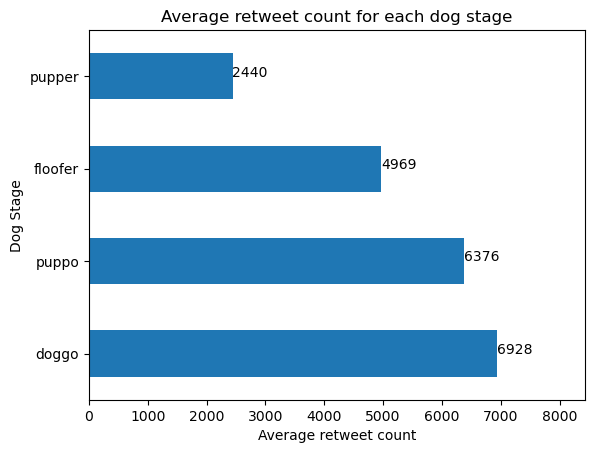

In [146]:
mean_popularity_by_dog_stages.sort_values('retweet_count', ascending=False, inplace=True)
mean_popularity_by_dog_stages.plot.barh(y='retweet_count', legend=False, xlim=(0, mean_popularity_by_dog_stages.retweet_count.max() + 1500))
plt.title('Average retweet count for each dog stage')
plt.ylabel('Dog Stage')
plt.xlabel('Average retweet count')
for ind, stage in enumerate(mean_popularity_by_dog_stages.index):
    mean_val = round(mean_popularity_by_dog_stages.at[stage,'retweet_count'])
    plt.annotate(mean_val, xy=(mean_val, ind))

plt.show();

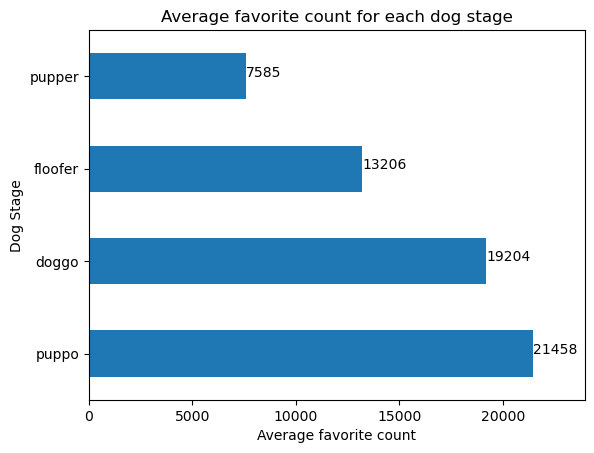

In [147]:
mean_popularity_by_dog_stages.sort_values('favorite_count', ascending=False, inplace=True)
mean_popularity_by_dog_stages.plot.barh(y='favorite_count', legend=False, xlim=(0, mean_popularity_by_dog_stages.favorite_count.max() + 2500))
plt.title('Average favorite count for each dog stage')
plt.ylabel('Dog Stage')
plt.xlabel('Average favorite count')
for ind, stage in enumerate(mean_popularity_by_dog_stages.index):
    mean_val = round(mean_popularity_by_dog_stages.at[stage,'favorite_count'])
    plt.annotate(mean_val, xy=(mean_val, ind))

plt.show();

**INSIGHT**: The dog teenagers were the most loved whereas the oldest dogs were the most shared!

# most loved dog names (i.e. the ones that had the most retweets and favorites)

- dog names are in the archive df
    - actually the names (that occur more than 3 times) themselves are already isolated in another variable
- then perform an analysis of both retweet and favorite counts

- get the tweets with multi-occurring dog names and the corresponding retweet and favorite counts
- determine the means
- plot the visual of the top 5 most popular names for retweets and favorites
    - annotate the graph accordingly

In [148]:
tweets_with_multi_occurring_names = wrd_archive_clean_df[wrd_archive_clean_df.name.isin(multi_dog_names)].loc[:,['tweet_id', 'name', 'retweet_count', 'favorite_count']]
tweets_with_multi_occurring_names.head()

,tweet_id,name,retweet_count,favorite_count
5,890971913173991426,Jax,2158,12041
8,890240255349198849,Cassie,7711,32467
9,890006608113172480,Koda,7624,31166
14,889278841981685760,Oliver,5637,25652
31,884876753390489601,Lola,6096,28514


In [149]:
mean_popularity_by_dog_names = tweets_with_multi_occurring_names.groupby('name').mean()
mean_popularity_by_dog_names.head()

,tweet_id,retweet_count,favorite_count
name,,,
Alfie,7.364800e+17,3158.25,11350.25
Bailey,7.595644e+17,2417.00,10144.00
Bear,7.839905e+17,1612.00,7007.25
Bella,7.706976e+17,4311.80,17941.20
Bentley,7.791986e+17,2317.00,9714.75


In [150]:
top_5_most_retweeted_dog_names = mean_popularity_by_dog_names.sort_values(by='retweet_count', ascending=False).head()
top_5_most_retweeted_dog_names

,tweet_id,retweet_count,favorite_count
name,,,
Bo,7.601675e+17,10984.80,27229.6
Dexter,7.492009e+17,6841.25,20602.0
Dave,7.766006e+17,5080.50,15133.0
Stanley,8.086293e+17,4766.20,19462.8
Bella,7.706976e+17,4311.80,17941.2


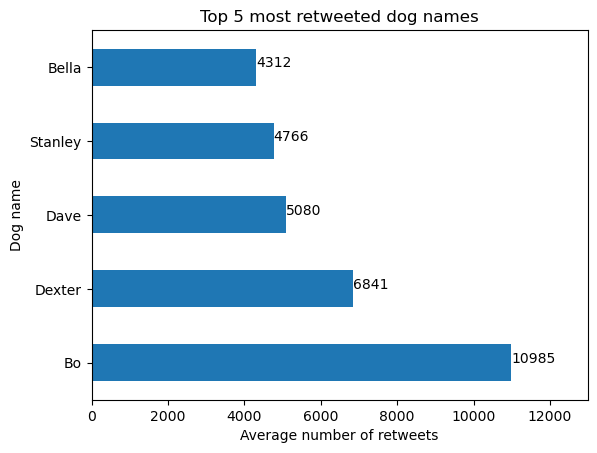

In [151]:
top_5_most_retweeted_dog_names.plot.barh(y='retweet_count', legend=False, xlim=(0, top_5_most_retweeted_dog_names.retweet_count.max() + 2000))
plt.title('Top 5 most retweeted dog names')
plt.ylabel('Dog name')
plt.xlabel('Average number of retweets')

for ind, name in enumerate(top_5_most_retweeted_dog_names.index):
    mean_val = top_5_most_retweeted_dog_names.at[name, 'retweet_count']
    plt.annotate(
        round(mean_val),
        xy=(mean_val, ind),
    )

plt.show();

In [152]:
top_5_most_favorited_dog_names = mean_popularity_by_dog_names.sort_values(by='favorite_count', ascending=False).head()
top_5_most_favorited_dog_names

,tweet_id,retweet_count,favorite_count
name,,,
Bo,7.601675e+17,10984.80,27229.6
Dexter,7.492009e+17,6841.25,20602.0
Stanley,8.086293e+17,4766.20,19462.8
Bella,7.706976e+17,4311.80,17941.2
Dave,7.766006e+17,5080.50,15133.0


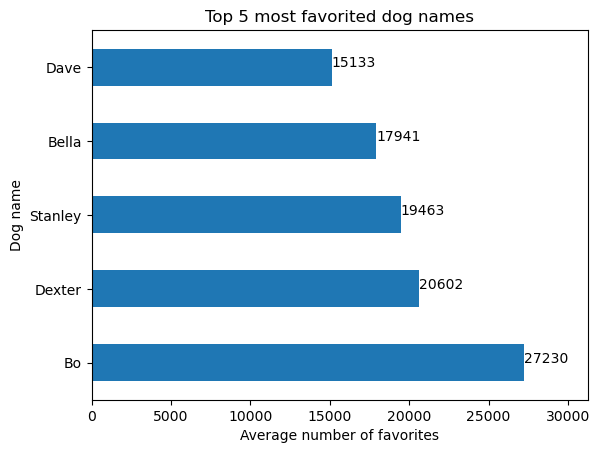

In [153]:
top_5_most_favorited_dog_names.plot.barh(y='favorite_count', legend=False, xlim=(0, top_5_most_favorited_dog_names.favorite_count.max() + 4000))
plt.title('Top 5 most favorited dog names')
plt.ylabel('Dog name')
plt.xlabel('Average number of favorites')

for ind, name in enumerate(top_5_most_favorited_dog_names.index):
    mean_val = top_5_most_favorited_dog_names.at[name, 'favorite_count']
    plt.annotate(
        round(mean_val),
        xy=(mean_val, ind),
    )

plt.show();

In [154]:
# compare the top 5 names for each
set(top_5_most_favorited_dog_names.index) == set(top_5_most_retweeted_dog_names.index)

True

**INSIGHT**: "Bo" appears to be both the most shared name and the most loved, impressive! Also the top 5 names are the same for both retweets and favorites, so it seems that the most popular names are also the most loved. All 5 are clearly nice names for dogs. 👌🏾🐶

Below are examples of tweets for each of those 5 names:

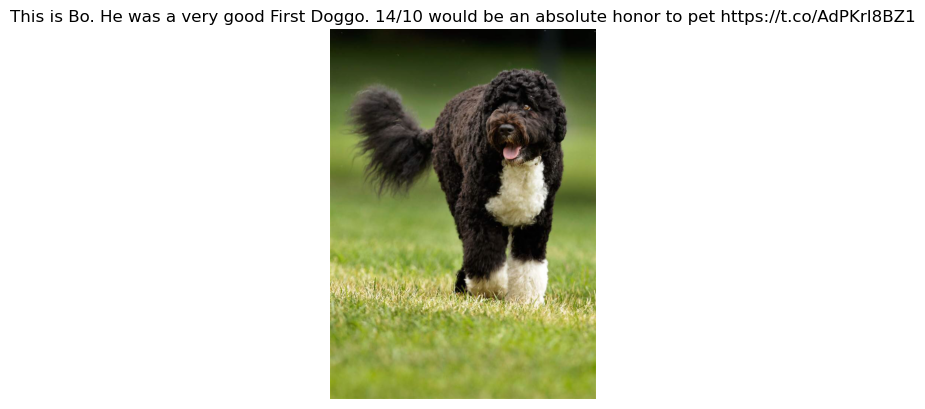

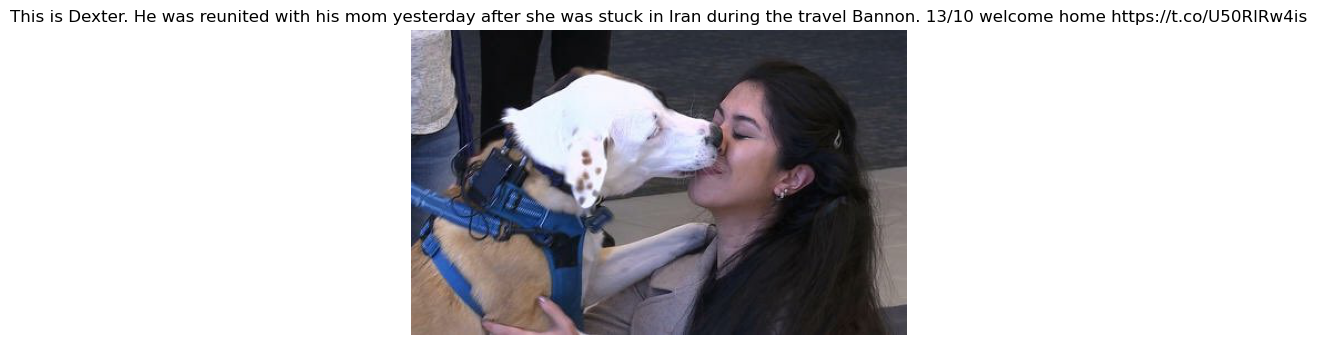

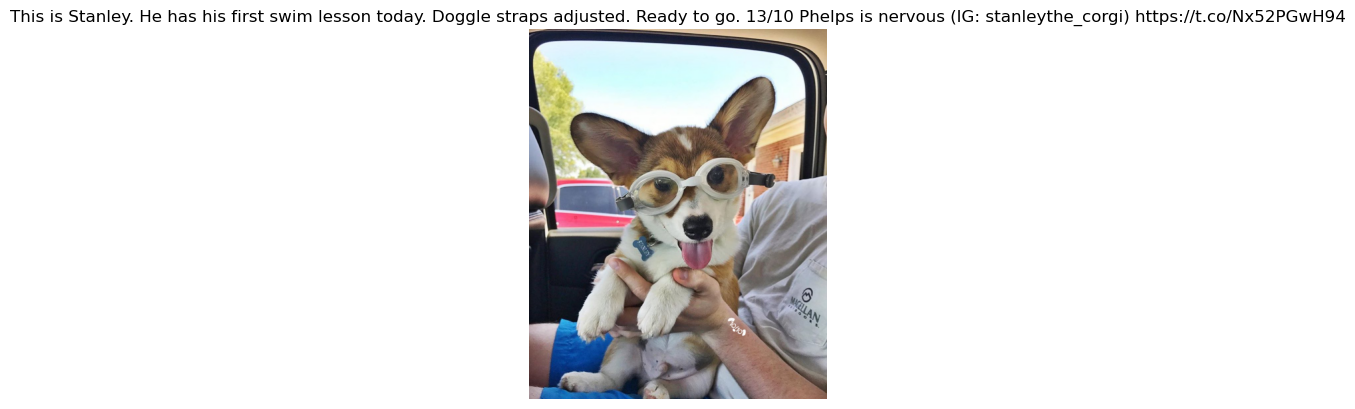

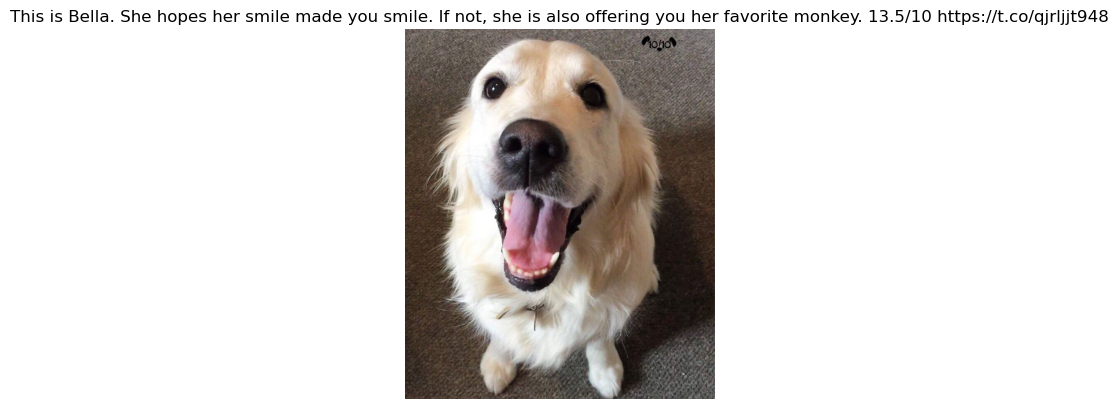

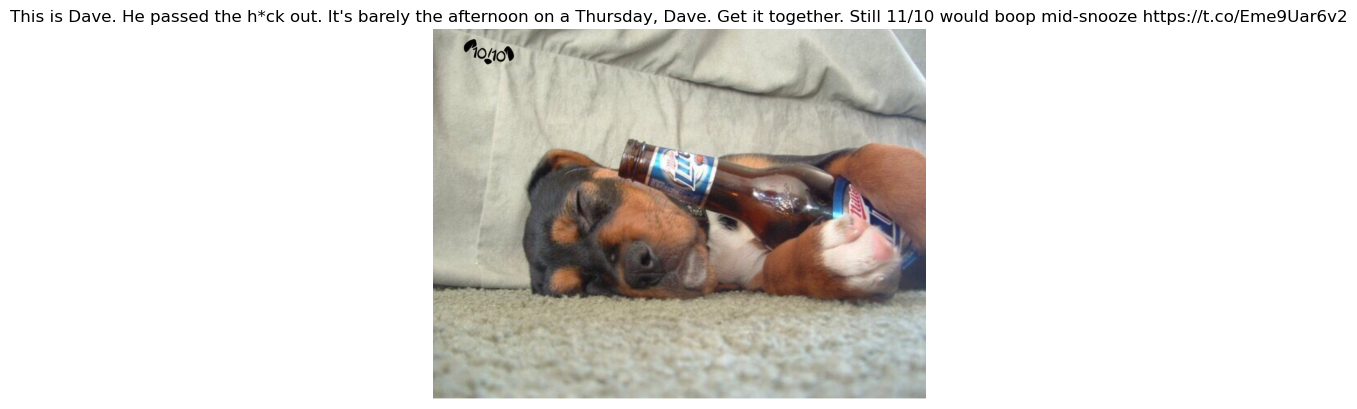

In [155]:
for name in top_5_most_favorited_dog_names.index:
    row = wrd_archive_clean_df.query(f'name == "{name}"').reset_index()
    render_tweet_image(row.jpg_url.at[0], row.text.at[0])
